In [644]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [645]:
df = pd.read_csv("./patient2025 - patient2025.csv")
df.head(10)

,HN,FBS,BMI,Diabetes,Chorestorol,age,hypertension,"vegetarian (1= yes, 0=no)",Marriage Status,Exercise (min/week),Living Area,stroke
0,11223,228.69,34.0,yes,201-220,71.0,1,1,Yes,0.0,Bangkok,1
1,8887,202.21,NaN,No,180-200,52.0,1,0,Yes,90.0,Country,1
2,5666,105.92,30.5,yes,180-200,78.0,1,1,Yes,0.0,Country,1
3,460182,171.23,35.0,No,221-260,54.0,1,0,Yes,0.0,Bangkok,1
4,166665,174.12,28.0,No,180-200,79.0,1,0,Yes,90.0,Country,1
5,56744,186.21,30.0,yes,201-220,80.0,1,0,Yes,0.0,Bangkok,1
6,14567,70.09,27.8,yes,180-200,74.0,1,1,Yes,0.0,Country,1
7,35678,94.39,22.9,No,180-200,60.0,1,0,No,0.0,Bangkok,1
8,27419,76.15,NaN,No,Unknown,83.0,1,0,Yes,0.0,Country,1
9,63491,58.57,NaN,No,Unknown,78.0,1,0,Yes,0.0,Bangkok,1


In [646]:
is_stroke = len(df[df.stroke == 1])
print(f"is stroke {is_stroke}")

is stroke 249


In [647]:
is_not_stroke = len(df[df.stroke == 0])
print(f"is not storke {is_not_stroke}")

is not storke 751


In [648]:
df.drop(columns = ['HN'])
# df = df.fillna(0)

le = LabelEncoder()
for col in ['Diabetes', 'Marriage Status', 'Living Area']:
    df[col] = le.fit_transform(df[col].astype(str))

new_chor = []

for i in df['Chorestorol']:
    x = str(i)
    if x == "Unknown":
        x = "0"
    else:
        low, high = x.split('-')
        med = (int(low) + int(high)) / 2
        x = med

    new_chor.append(x)

df['Chorestorol'] = new_chor
df

features = ['FBS', 'BMI', 'Diabetes', 'Chorestorol', 'age', 'hypertension', 'vegetarian (1= yes, 0=no)',	'Marriage Status', 'Exercise (min/week)', 'Living Area']

X = df[features]
y = df.stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

df

0.7633333333333333


,HN,FBS,BMI,Diabetes,Chorestorol,age,hypertension,"vegetarian (1= yes, 0=no)",Marriage Status,Exercise (min/week),Living Area,stroke
0,11223,228.69,34.0,1,210.5,71.00,1,1,1,0.0,0,1
1,8887,202.21,NaN,0,190.0,52.00,1,0,1,90.0,1,1
2,5666,105.92,30.5,1,190.0,78.00,1,1,1,0.0,1,1
3,460182,171.23,35.0,0,240.5,54.00,1,0,1,0.0,0,1
4,166665,174.12,28.0,0,190.0,79.00,1,0,1,90.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,60211,90.51,18.9,1,0,1.40,0,0,0,120.0,0,0
996,53279,118.87,16.3,1,0,0.24,0,0,0,120.0,1,0
997,61715,56.42,31.8,1,190.0,55.00,0,0,1,0.0,1,0
998,37830,73.67,21.0,0,0,29.00,0,0,0,0.0,0,0


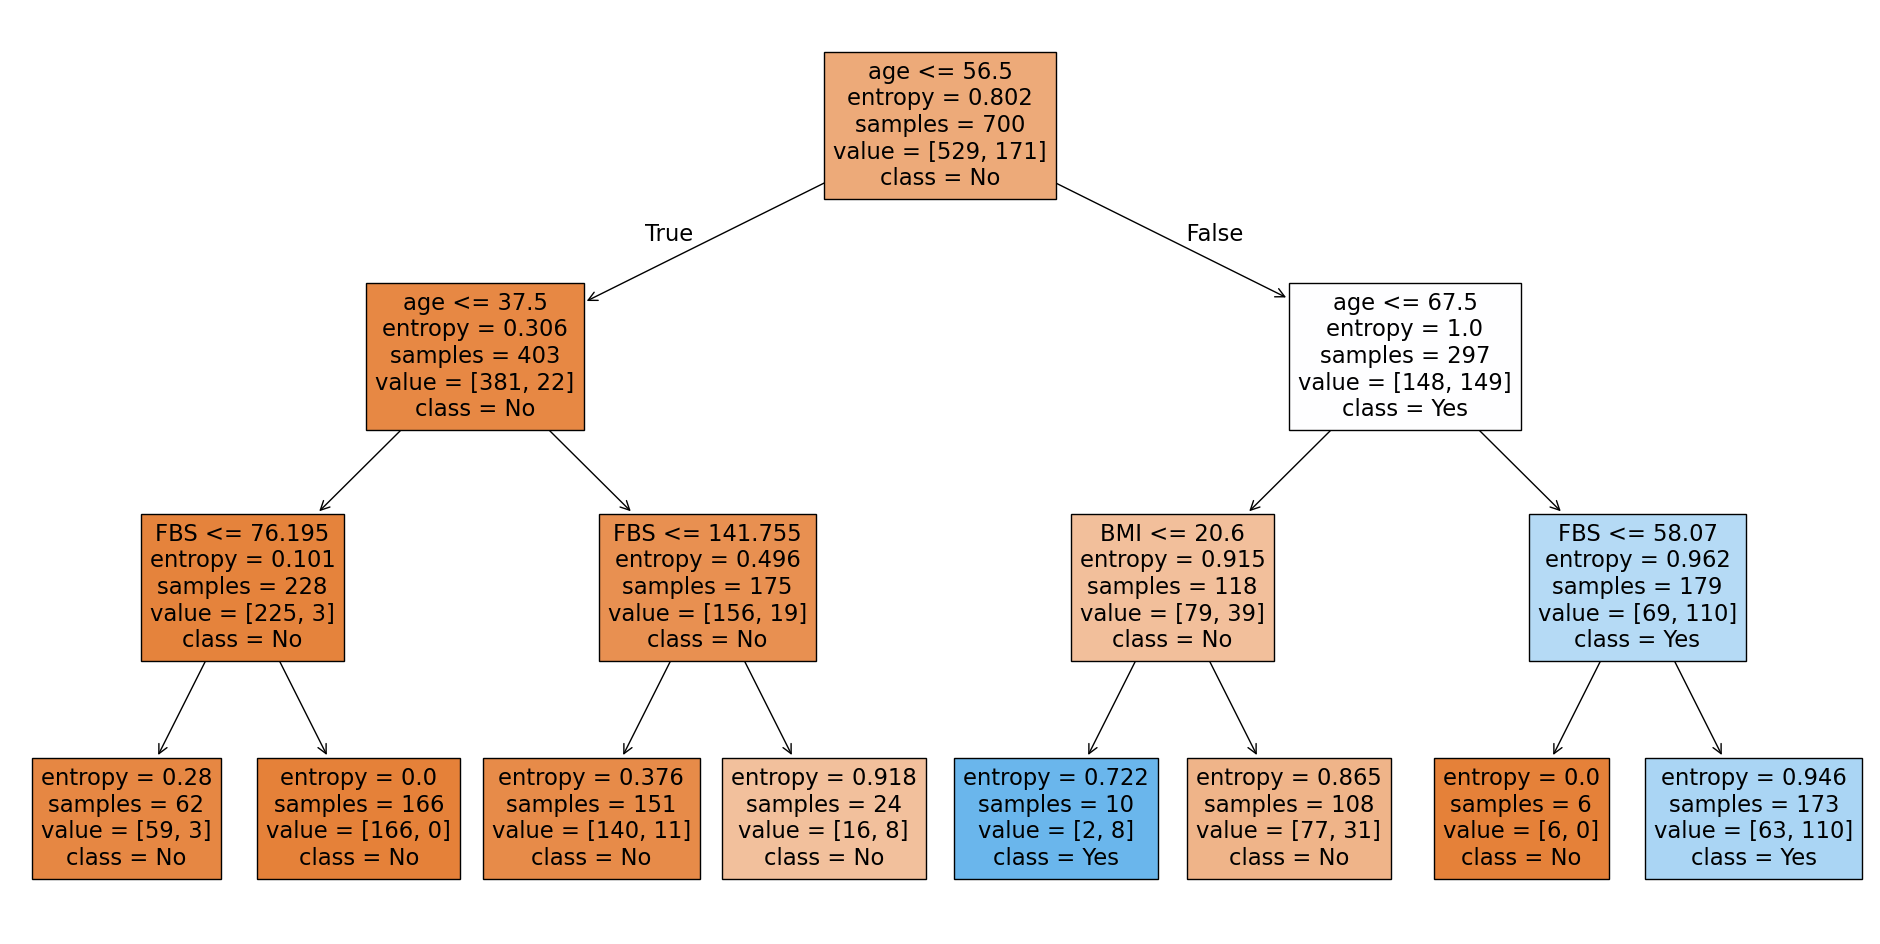

In [649]:
plt.figure(figsize=(24, 12))
tree.plot_tree(clf,
               feature_names = X.columns,
               class_names = ['No', 'Yes'],
               filled = True)
plt.show()